In [1]:
import pandas
import sklearn
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import collections
from tabulate import tabulate
from sklearn.decomposition import PCA

In [2]:
df = pandas.read_csv("menu.csv")
print(df)

               Category                                               Item  \
0             Breakfast                                       Egg McMuffin   
1             Breakfast                                  Egg White Delight   
2             Breakfast                                   Sausage McMuffin   
3             Breakfast                          Sausage McMuffin with Egg   
4             Breakfast                   Sausage McMuffin with Egg Whites   
..                  ...                                                ...   
255  Smoothies & Shakes                 McFlurry with Oreo Cookies (Small)   
256  Smoothies & Shakes                McFlurry with Oreo Cookies (Medium)   
257  Smoothies & Shakes                 McFlurry with Oreo Cookies (Snack)   
258  Smoothies & Shakes  McFlurry with Reese's Peanut Butter Cups (Medium)   
259  Smoothies & Shakes   McFlurry with Reese's Peanut Butter Cups (Snack)   

        Serving Size  Calories  Calories from Fat  Total Fat  \

In [3]:
labels = []
for c in df['Category']:
    labels.append(c)

In [4]:
print( labels)

['Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Breakfast', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Beef & Pork', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & Fish', 'Chicken & F

Delete category and item columns

In [5]:
df.pop("Category")
df.pop("Item")
df.pop("Serving Size")

df.pop("Total Fat")
df.pop("Saturated Fat")
df.pop("Cholesterol")
df.pop("Sodium")
df.pop("Carbohydrates")
df.pop("Dietary Fiber")

0      4
1      4
2      4
3      4
4      4
      ..
255    1
256    1
257    1
258    2
259    1
Name: Dietary Fiber, Length: 260, dtype: int64

In [6]:
print(df)

     Calories  Calories from Fat  Total Fat (% Daily Value)  \
0         300                120                         20   
1         250                 70                         12   
2         370                200                         35   
3         450                250                         43   
4         400                210                         35   
..        ...                ...                        ...   
255       510                150                         26   
256       690                200                         35   
257       340                100                         17   
258       810                290                         50   
259       410                150                         25   

     Saturated Fat (% Daily Value)  Trans Fat  Cholesterol (% Daily Value)  \
0                               25        0.0                           87   
1                               15        0.0                            8   
2        

In [7]:
df_normalized = ((df-df.min())/(df.max()-df.min()))*10

In [8]:
print(df_normalized)

     Calories  Calories from Fat  Total Fat (% Daily Value)  \
0    1.595745           1.132075                   1.098901   
1    1.329787           0.660377                   0.659341   
2    1.968085           1.886792                   1.923077   
3    2.393617           2.358491                   2.362637   
4    2.127660           1.981132                   1.923077   
..        ...                ...                        ...   
255  2.712766           1.415094                   1.428571   
256  3.670213           1.886792                   1.923077   
257  1.808511           0.943396                   0.934066   
258  4.308511           2.735849                   2.747253   
259  2.180851           1.415094                   1.373626   

     Saturated Fat (% Daily Value)  Trans Fat  Cholesterol (% Daily Value)  \
0                         2.450980        0.0                     4.531250   
1                         1.470588        0.0                     0.416667   
2        

K-Means Clustering

In [9]:
X = df_normalized.values

In [10]:
print(X)

[[1.59574468 1.13207547 1.0989011  ... 0.         3.57142857 3.75      ]
 [1.32978723 0.66037736 0.65934066 ... 0.         3.57142857 2.        ]
 [1.96808511 1.88679245 1.92307692 ... 0.         3.57142857 2.5       ]
 ...
 [1.80851064 0.94339623 0.93406593 ... 0.         3.57142857 1.5       ]
 [4.30851064 2.73584906 2.74725275 ... 0.         8.57142857 1.5       ]
 [2.18085106 1.41509434 1.37362637 ... 0.         4.28571429 1.        ]]


In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++')
kmeans.fit(X)

labels = kmeans.labels_
score = sklearn.metrics.davies_bouldin_score(X, labels)
print(score)

1.1274868859144935


kmeans++

In [12]:
kmeans = KMeans(n_clusters=5, n_init=1, max_iter=1, init='k-means++')

In [13]:
def train_kmeans(X, init):
    kmeans = KMeans(n_clusters=5, n_init=1, max_iter=1, init=init)

    state = None
    i = 0
    ys = []
    while True:
        kmeans.fit(X)

        labels = kmeans.labels_
        centroids = kmeans.cluster_centers_

        if np.array_equal(state, labels):
            break

        kmeans.init = centroids
        state = labels

        inertia = kmeans.inertia_
        score = sklearn.metrics.davies_bouldin_score(X, labels)
        i += 1

        ys.append(score)
#         print(i, inertia, score)

#     print('-' * 100, end='\n\n')

    return ys

In [14]:
train_kmeans(X, 'k-means++')

[1.7911178414415088,
 1.5247855010290052,
 1.3788965407695657,
 1.3465136890253262,
 1.3425794521169427,
 1.338980673609863]

In [15]:
train_kmeans(X, 'random')

[1.2123180555462305, 1.2074239584584354]

In [16]:
init = np.random.uniform(0.0, 1.0, (5, X.shape[1]))
train_kmeans(X, init)

[1.5429539182344834,
 1.4708910559244184,
 1.4637346147725556,
 1.461765606496766,
 1.3885747998484637,
 1.2773797836170835,
 1.2364267315884607,
 1.214244104239484,
 1.2115600561377897,
 1.205557348184263,
 1.2013637788686231]

In [17]:
plus_plus_max_iter = 0
plus_plus_results = []
plus_plus_mean = 0
plus_plus_std = 0
for i in range(50):
    ys = train_kmeans(X, 'k-means++')
    plus_plus_results.append(ys)
    xs = len(ys)
    plus_plus_max_iter = max(plus_plus_max_iter, xs)
    


xs = list(range(1, plus_plus_max_iter + 1))
for j in range(50):
    last = plus_plus_results[j][-1]
    while len(plus_plus_results[j]) < plus_plus_max_iter:
        plus_plus_results[j].append(last)
    
plus_plus_mean = np.mean(plus_plus_results, axis=0)
plus_plus_std = np.std(plus_plus_results, axis=0)

print(len(plus_plus_mean) )

17


In [18]:
random_max_iter = 0
random_results = []
random_mean = 0
random_std = 0

for i in range(50):

    ys = train_kmeans(X, 'random')
    random_results.append(ys)
    xs = len(ys)
    random_max_iter = max(random_max_iter, xs)


xs = list(range(1, random_max_iter + 1))
for j in range(50):
    last = random_results[j][-1]
    while len(random_results[j]) < random_max_iter:
        random_results[j].append(last)
    
random_mean = np.mean(random_results, axis=0)
random_std = np.std(random_results, axis=0)

print(len(random_mean) )
print( len(random_std) )

26
26


In [19]:
total_random_max_iter = 0
total_random_results = []
total_random_mean = 0
total_random_std = 0


for i in range(50):
    init = np.random.uniform(0.0, 1.0, (5, X.shape[1]))
    ys = train_kmeans(X, init)
    total_random_results.append(ys)
    xs = len(ys)
    total_random_max_iter = max(total_random_max_iter, xs)


xs = list(range(1, random_max_iter + 1))
for j in range(50):
    last = total_random_results[j][-1]
    while len(total_random_results[j]) < total_random_max_iter:
        total_random_results[j].append(last)
    
total_random_mean = np.mean(total_random_results, axis=0)
total_random_std = np.std(total_random_results, axis=0)

print(len(total_random_mean) )

32


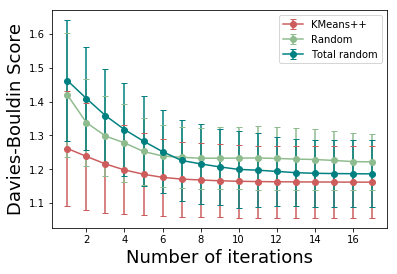

In [20]:
# for algorithm_name, mean, std in zip(names, means, stds):
#     plt.errorbar(xs, mean, std, label=algorithm_name, capsize=3, marker='o')

min_iter = min(plus_plus_max_iter, random_max_iter, total_random_max_iter)
# print( max_iter )

plus_plus_mean = plus_plus_mean[0:min_iter]
plus_plus_std = plus_plus_std[0:min_iter]

random_mean = random_mean[0:min_iter]
random_std = random_std[0:min_iter]

total_random_mean = total_random_mean[0:min_iter]
total_random_std = total_random_std[0:min_iter]

xs = list(range(1, min_iter + 1))
plt.errorbar(xs, plus_plus_mean, plus_plus_std, label='KMeans++', capsize=3, marker='o', color='indianred')
plt.errorbar(xs, random_mean, random_std, label='Random', capsize=3, marker='o', color='darkseagreen')
plt.errorbar(xs, total_random_mean, total_random_std, label='Total random', capsize=3, marker='o', color='teal')


plt.xlabel('Number of iterations', fontsize=18)
plt.ylabel('Davies-Bouldin Score', fontsize=18)
plt.legend()
plt.show()


In [21]:
def plot_k_means_for_various_k(X, k_min=3, k_max=25, n_iters=10):
    ks = list(range(k_min, k_max + 1))
    means, stds = [], []
    for k in ks:
        results = []
        for _ in range(n_iters):
            kmeans = KMeans(n_clusters = k, init='k-means++')
            kmeans.fit(X)

            labels = kmeans.labels_
            score = sklearn.metrics.davies_bouldin_score(X, labels)
            results.append(score)

        means.append(np.mean(results))
        stds.append(np.std(results))

    plt.errorbar(ks, means, stds, label='k-means++', capsize=3, marker='o')

    plt.xlabel('K', fontsize=18)
    plt.ylabel('Davies-Bouldin Score', fontsize=18)
    plt.legend()
    plt.show()


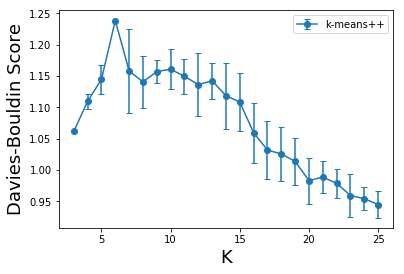

In [22]:
plot_k_means_for_various_k(X, k_min=3, k_max=25, n_iters=10)

Best k = 6

In [23]:
def plot_pca_2d(X, labels, k, centers=False):
    projected = PCA(2).fit_transform(X)
    c = list(range(k))

    cs = []
    for i in range(X.shape[0]):
        cs.append(c[labels[i]])

    if centers:
        plt.scatter(projected[:, 0], projected[:, 1], label=labels, marker='D', c=cs, s=60, cmap='rainbow')
    else:
        plt.scatter(projected[:, 0], projected[:, 1], label=labels, c=cs, cmap='rainbow')


def plot_k_means_clusters(df, k = 6, init='k-means++'):
    X = df.values
    kmeans = KMeans(n_clusters=k, init=init)
    kmeans.fit(X)

    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    counter = collections.Counter(labels)
    df = pandas.DataFrame(centers, columns=df.columns)

    # todo characterize results
    print('Elements in clusters')
    for key, value in sorted(counter.items()):
        print(f'{key}: {value}')

#     print(tabulate(df.head(), headers='keys', tablefmt='psql'))

    plot_pca_2d(X, labels, k)
    plot_pca_2d(centers, np.array(range(k)), k, centers=True)
    plt.xlabel('Component X', fontsize=18)
    plt.ylabel('Component Y', fontsize=18)
    plt.title('By Clusters', fontsize=22)
    plt.show()


Elements in clusters
0: 67
1: 49
2: 67
3: 30
4: 7
5: 40


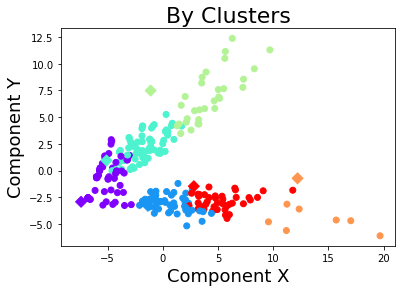

In [24]:
plot_k_means_clusters(df_normalized, k = 6, init='k-means++')

In [25]:
def plot_categories(X, k, category_labels):
    plot_pca_2d(X, category_labels, k)
    plt.xlabel('Component X', fontsize=18)
    plt.ylabel('Component Y', fontsize=18)
    plt.title('By Categories', fontsize=22)
    plt.show()


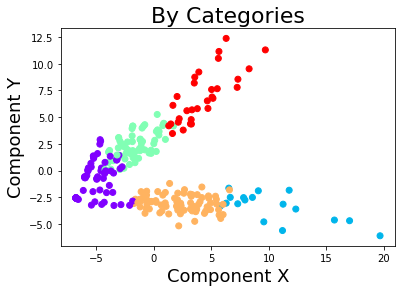

In [26]:
plot_categories(X, len(labels), labels)